CARREGANDO DADOS DO DATASET HAR
Dimensões X_train: (7352, 561)
Dimensões y_train: (7352,)
Dimensões X_test: (2947, 561)
Dimensões y_test: (2947,)
Número de classes: 6


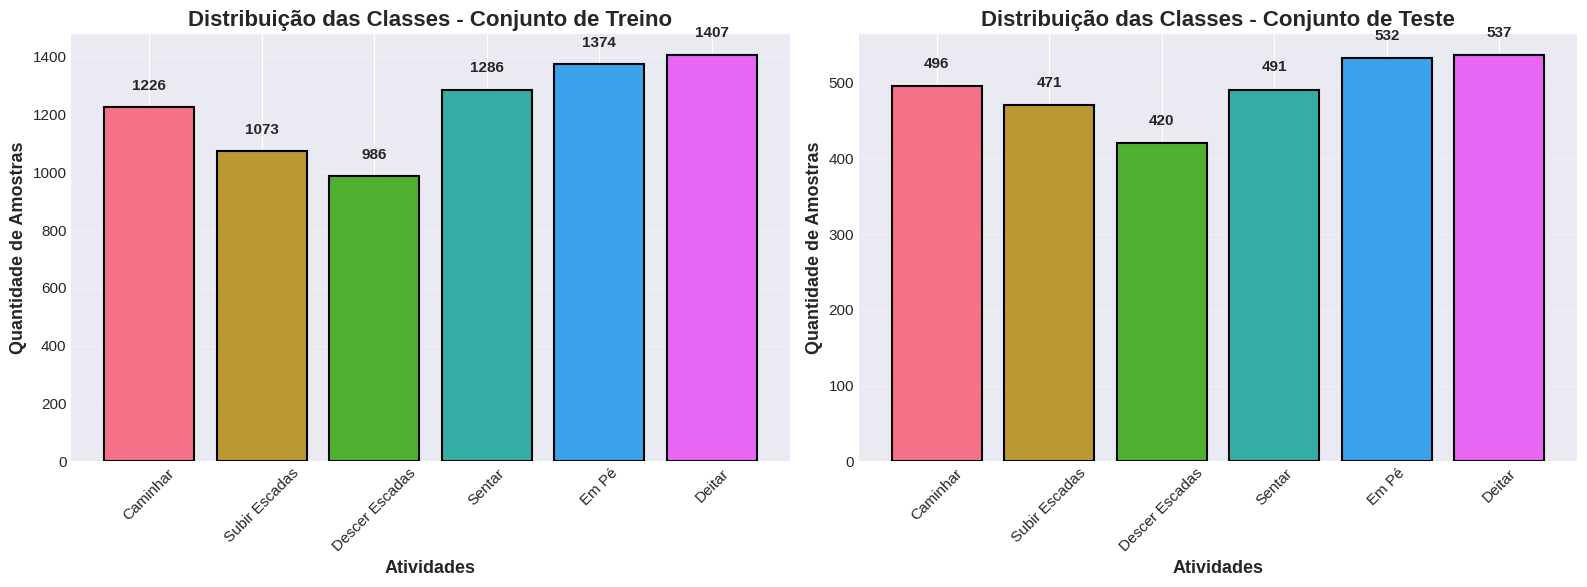


NORMALIZANDO OS DADOS


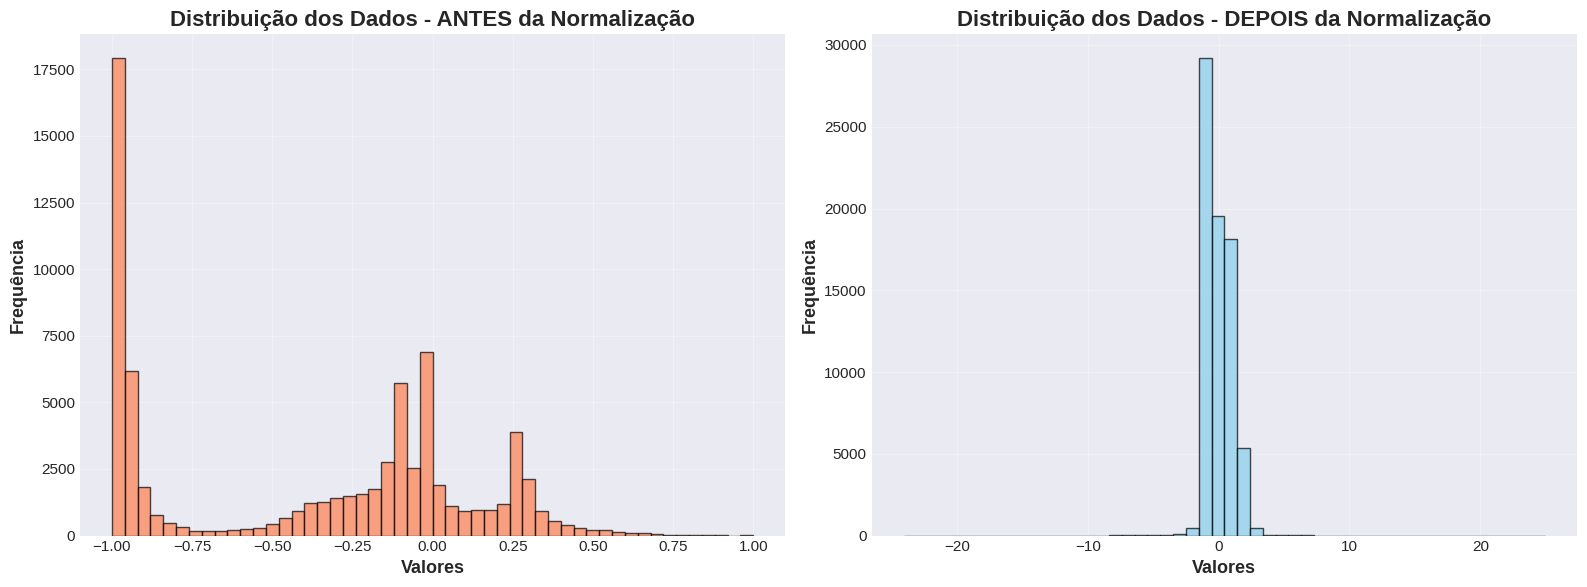

Normalização concluída!

CENÁRIO 1: SEM LDA

### K-NEAREST NEIGHBORS (KNN) ###

--- Avaliando KNN (k=5) ---
Validação Cruzada (k=10):
  Accuracy: 0.9641 (+/- 0.0072)
  Precision: 0.9673
  Recall: 0.9654
  F1-Score: 0.9658

Conjunto de Teste:
  Accuracy: 0.8802
  Precision: 0.8897
  Recall: 0.8746
  F1-Score: 0.8766

### SUPPORT VECTOR MACHINE (SVM) ###

--- Avaliando SVM (RBF, C=10) ---
Validação Cruzada (k=10):
  Accuracy: 0.9888 (+/- 0.0054)
  Precision: 0.9895
  Recall: 0.9897
  F1-Score: 0.9896

Conjunto de Teste:
  Accuracy: 0.9549
  Precision: 0.9559
  Recall: 0.9531
  F1-Score: 0.9540

### MULTI-LAYER PERCEPTRON (MLP) ###

--- Avaliando MLP (400,200) ---
Validação Cruzada (k=10):
  Accuracy: 0.9808 (+/- 0.0056)
  Precision: 0.9822
  Recall: 0.9821
  F1-Score: 0.9820

Conjunto de Teste:
  Accuracy: 0.9420
  Precision: 0.9465
  Recall: 0.9398
  F1-Score: 0.9414


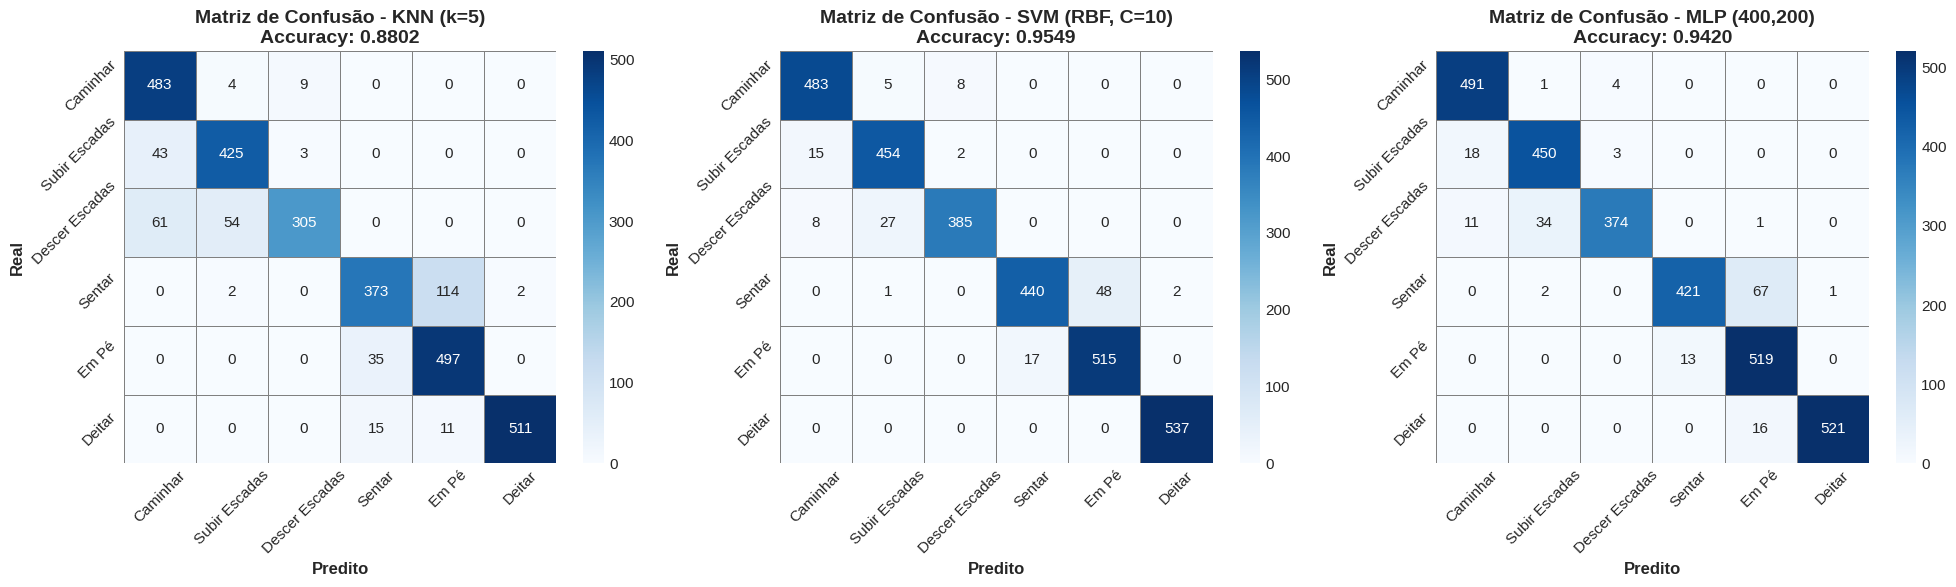


CENÁRIO 2: COM LDA

Aplicando Linear Discriminant Analysis (LDA)...
Dimensões após LDA: (7352, 5)
Variância explicada: 1.0000


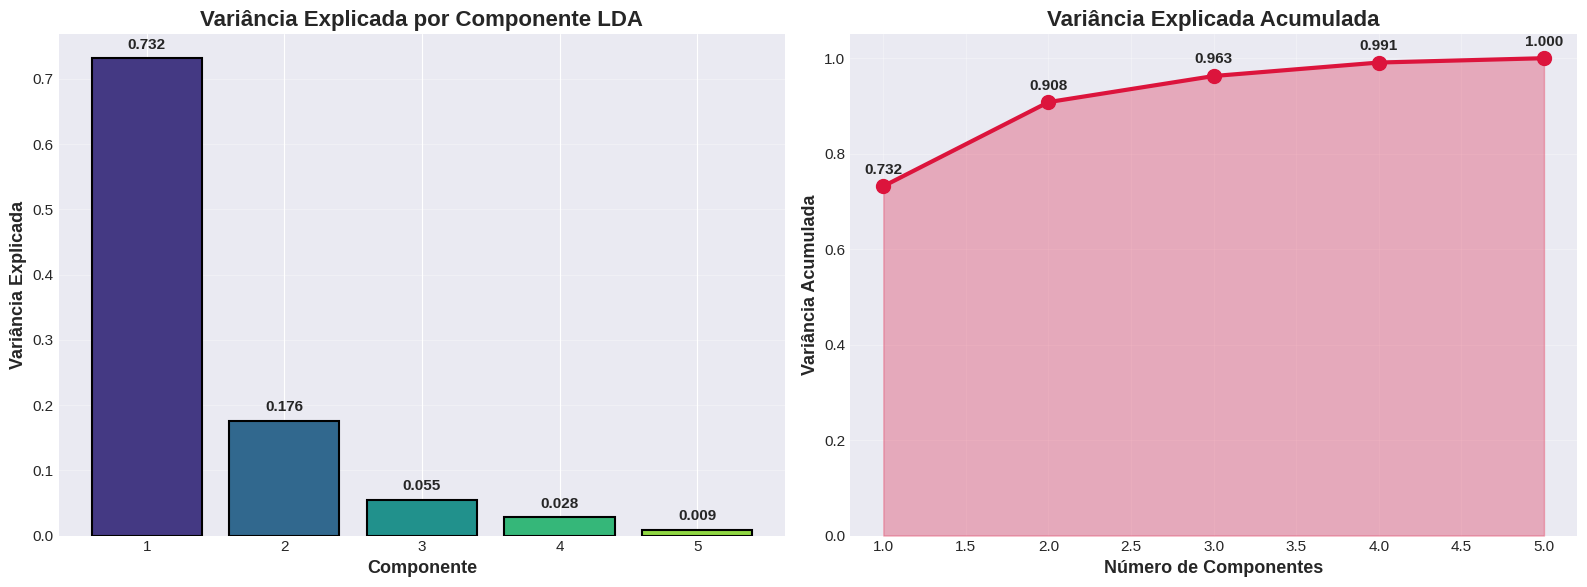


### K-NEAREST NEIGHBORS (KNN) com LDA ###

--- Avaliando KNN (k=5) + LDA ---
Validação Cruzada (k=10):
  Accuracy: 0.9859 (+/- 0.0039)
  Precision: 0.9870
  Recall: 0.9870
  F1-Score: 0.9869

Conjunto de Teste:
  Accuracy: 0.9644
  Precision: 0.9668
  Recall: 0.9642
  F1-Score: 0.9649

### SUPPORT VECTOR MACHINE (SVM) com LDA ###

--- Avaliando SVM (RBF, C=10) + LDA ---
Validação Cruzada (k=10):
  Accuracy: 0.9865 (+/- 0.0046)
  Precision: 0.9876
  Recall: 0.9876
  F1-Score: 0.9876

Conjunto de Teste:
  Accuracy: 0.9620
  Precision: 0.9642
  Recall: 0.9617
  F1-Score: 0.9624

### MULTI-LAYER PERCEPTRON (MLP) com LDA ###

--- Avaliando MLP (10,5) + LDA ---
Validação Cruzada (k=10):
  Accuracy: 0.9812 (+/- 0.0050)
  Precision: 0.9829
  Recall: 0.9826
  F1-Score: 0.9826

Conjunto de Teste:
  Accuracy: 0.9664
  Precision: 0.9676
  Recall: 0.9662
  F1-Score: 0.9666


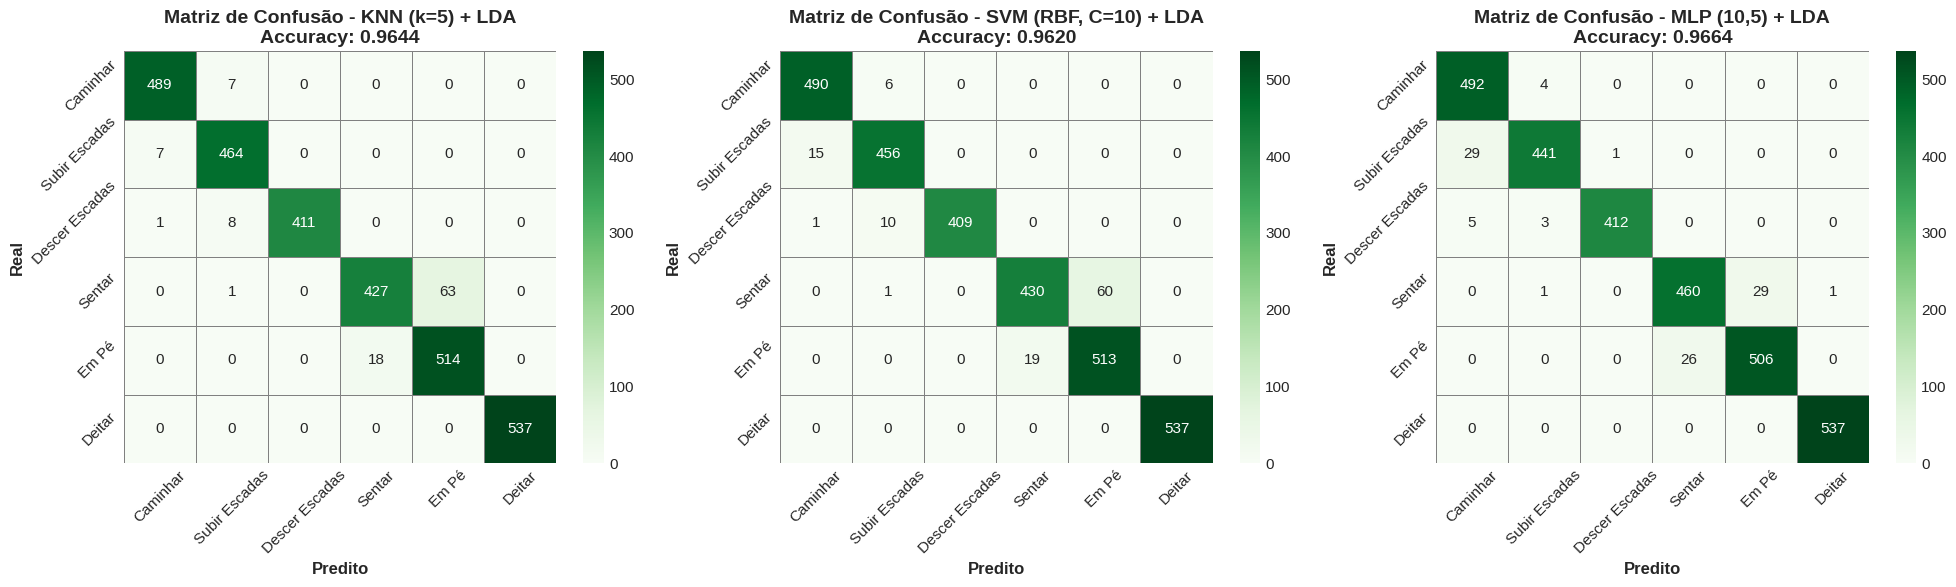


COMPARAÇÃO FINAL DOS RESULTADOS

### RESUMO - VALIDAÇÃO CRUZADA (k=10) ###
               modelo  cv_accuracy_mean  cv_precision_mean  cv_recall_mean  cv_f1_mean
            KNN (k=5)          0.964089           0.967296        0.965419    0.965809
      SVM (RBF, C=10)          0.988846           0.989490        0.989747    0.989569
        MLP (400,200)          0.980821           0.982234        0.982104    0.981986
      KNN (k=5) + LDA          0.985854           0.987010        0.986958    0.986934
SVM (RBF, C=10) + LDA          0.986534           0.987646        0.987630    0.987564
     MLP (10,5) + LDA          0.981230           0.982869        0.982649    0.982640

### RESUMO - CONJUNTO DE TESTE ###
               modelo  test_accuracy  test_precision  test_recall  test_f1
            KNN (k=5)       0.880217        0.889699     0.874631 0.876608
      SVM (RBF, C=10)       0.954869        0.955883     0.953090 0.953953
        MLP (400,200)       0.941975        0.946452  

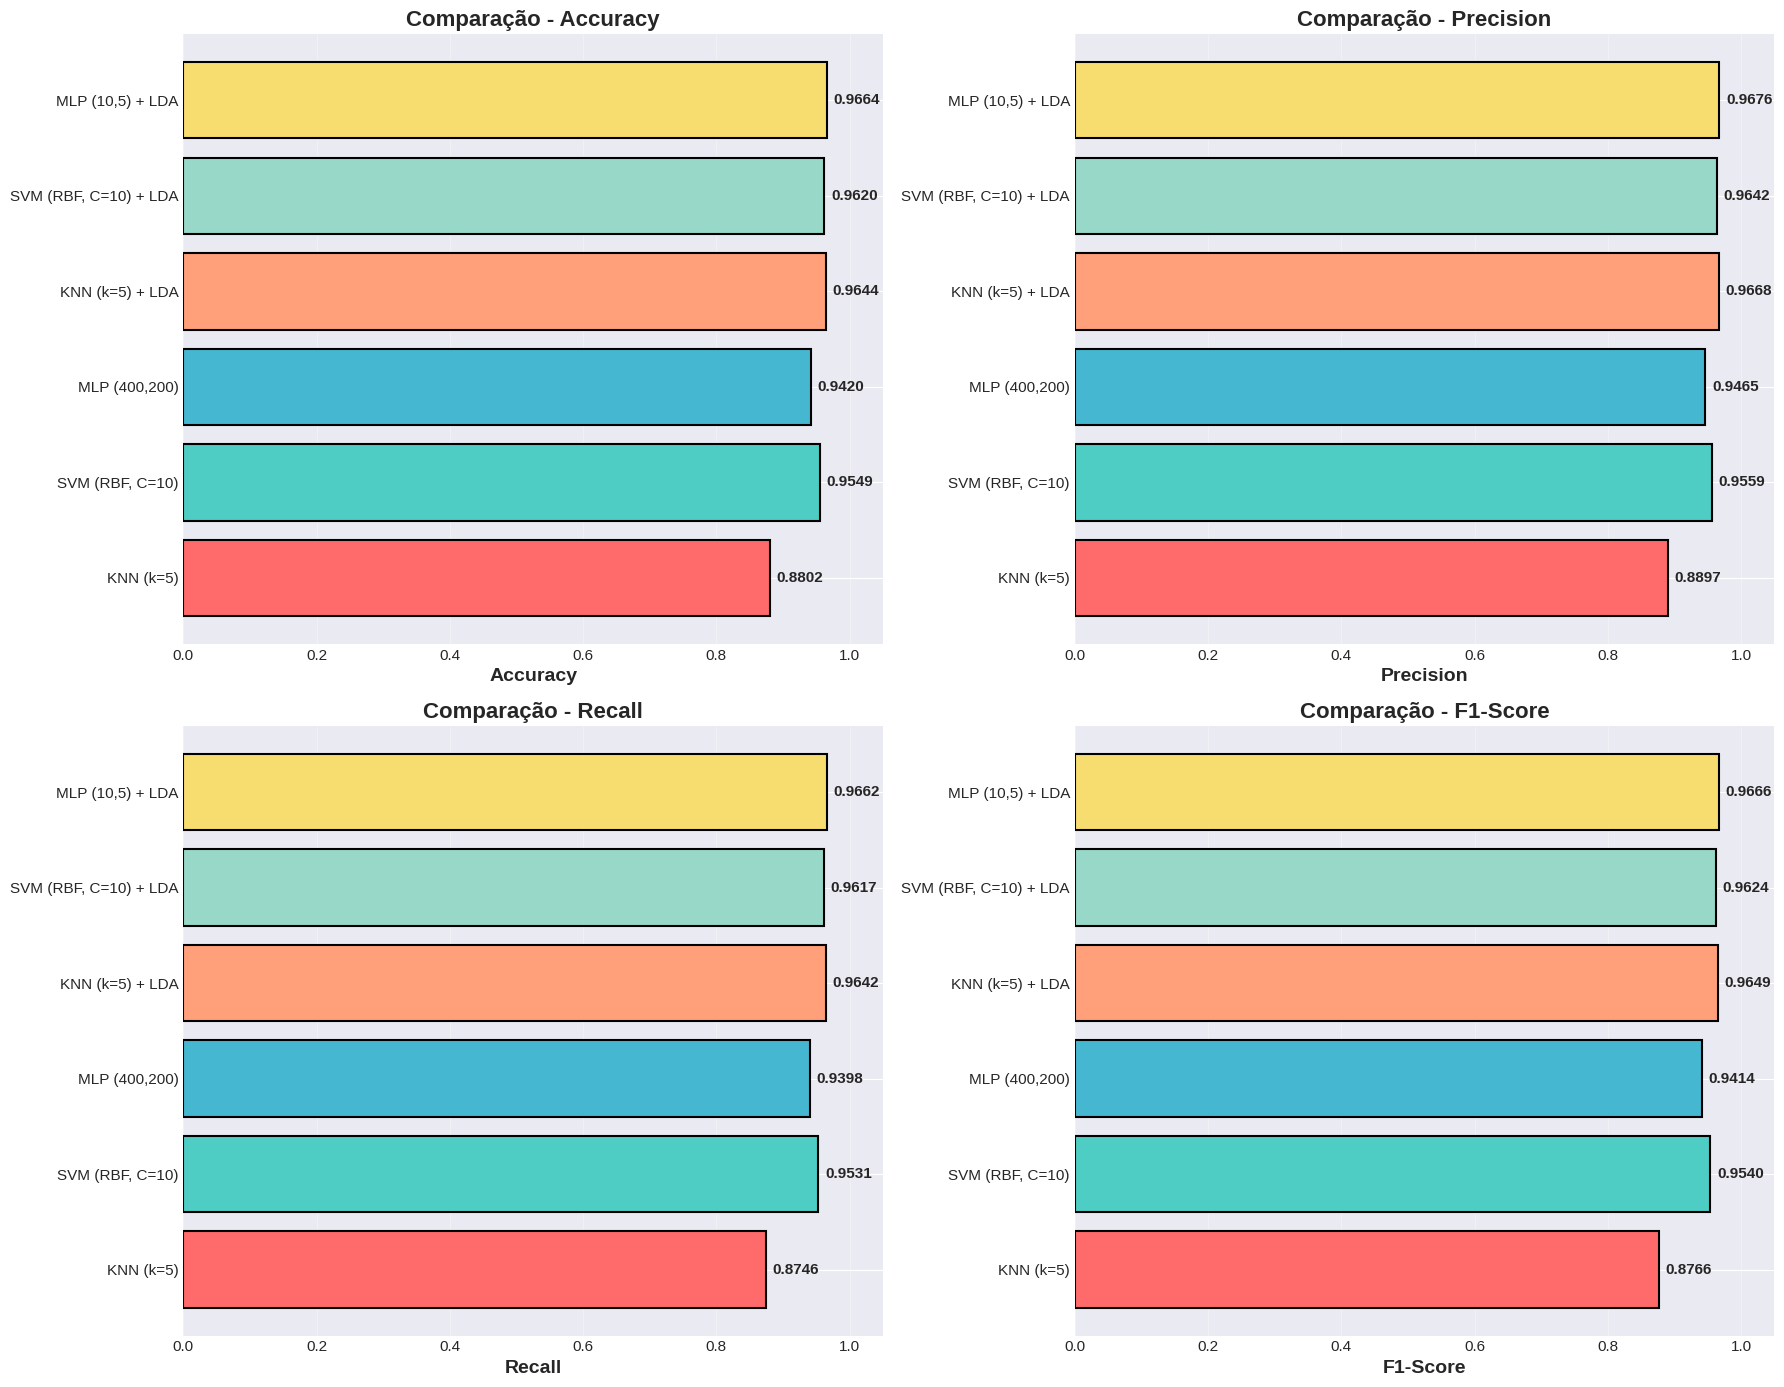

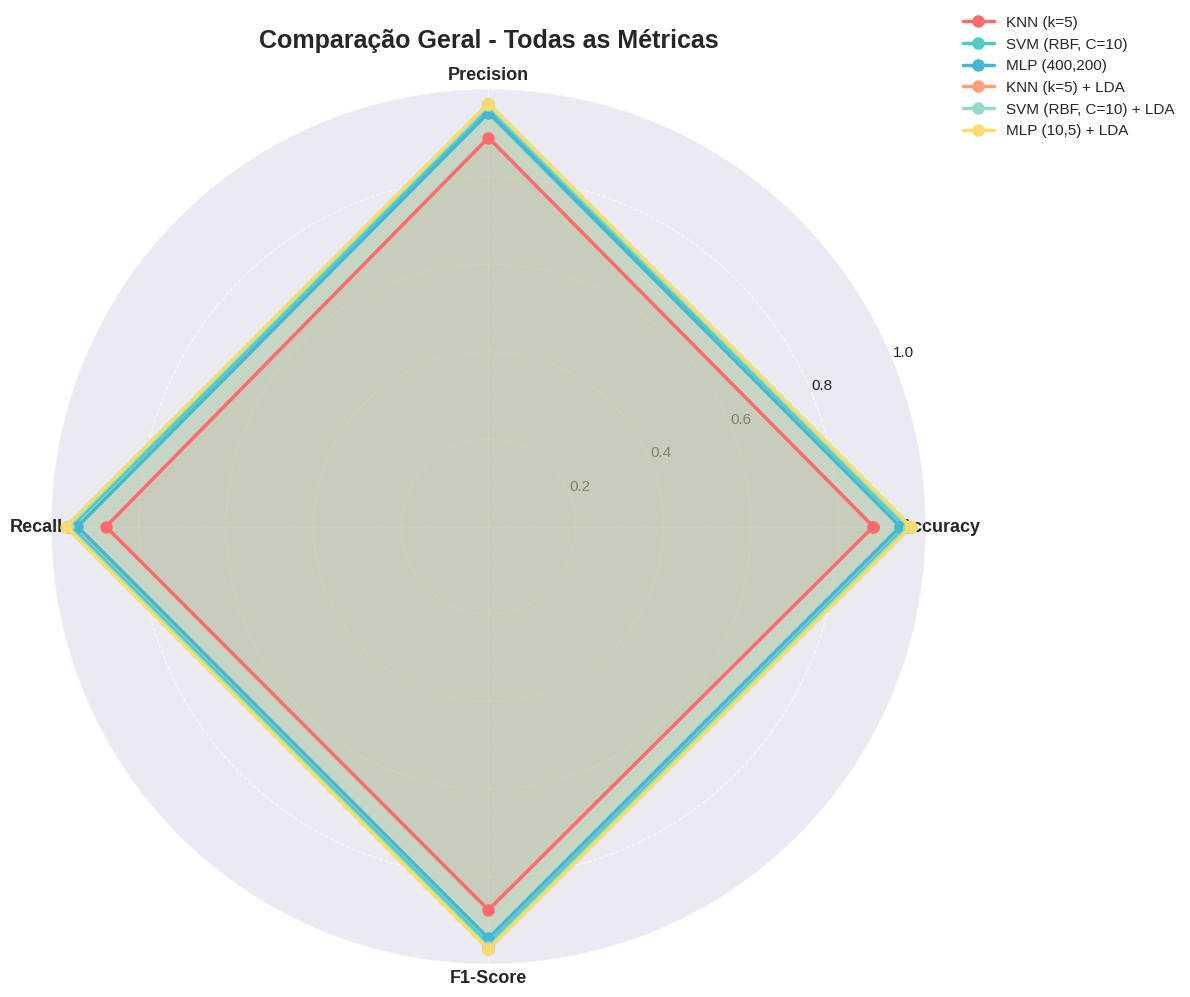

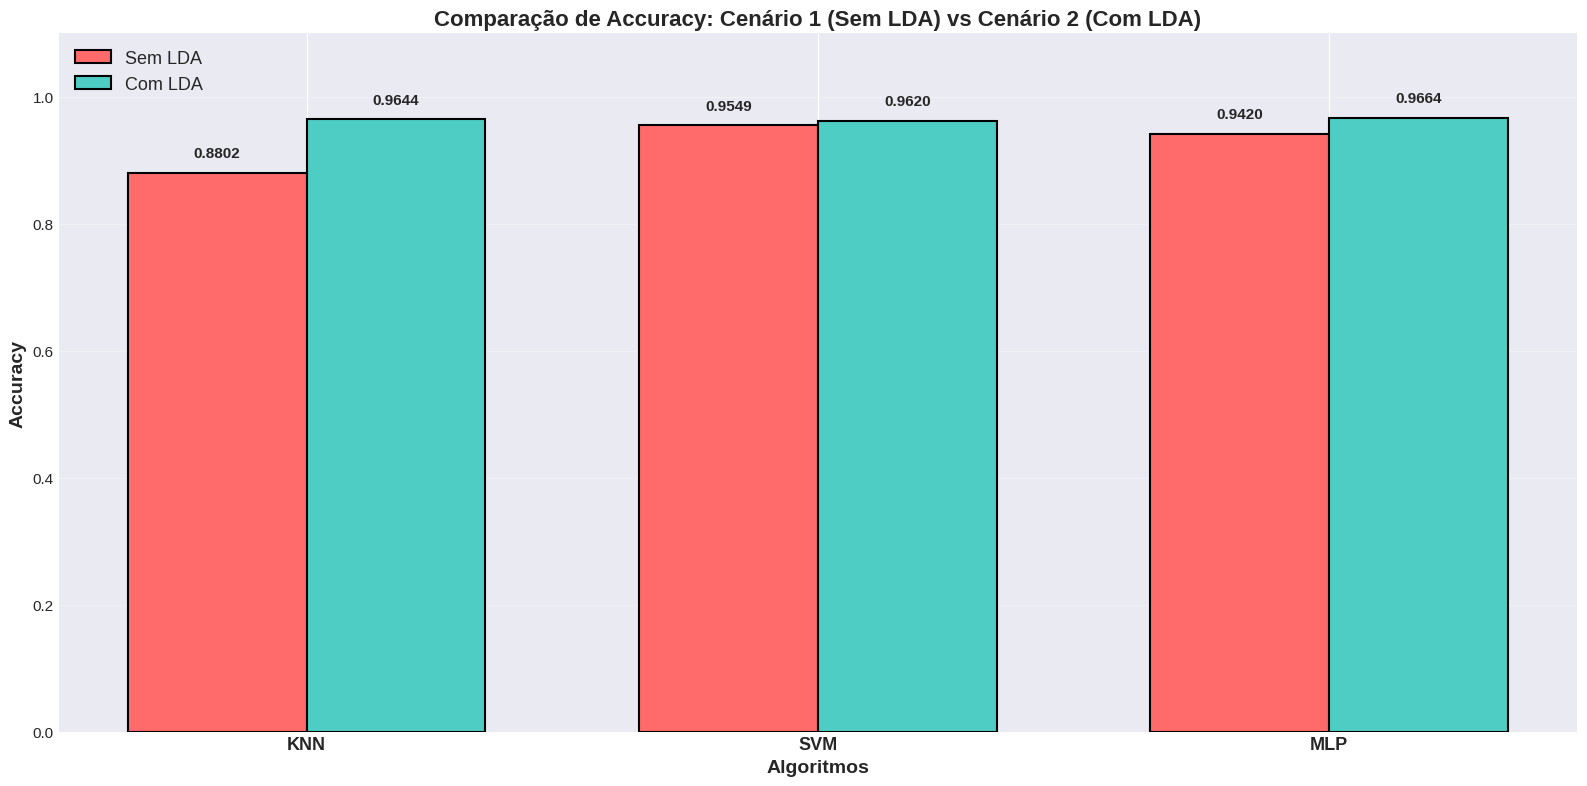

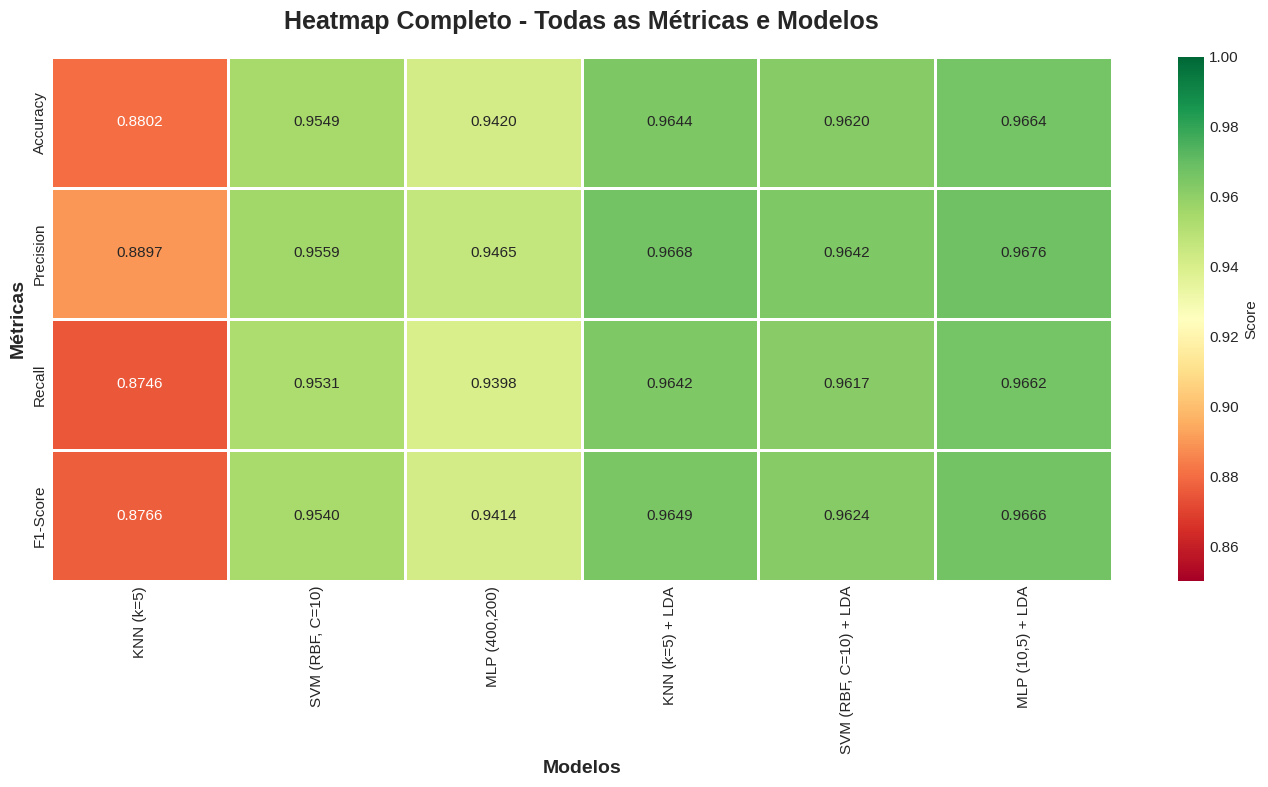


🏆 MELHOR MODELO: MLP (10,5) + LDA
   Accuracy: 0.9664
   F1-Score: 0.9666

ANÁLISE CONCLUÍDA!

📊 Gráficos salvos:
   - 01_distribuicao_classes.png
   - 02_normalizacao.png
   - 03_confusion_matrix_cenario1.png
   - 04_lda_variance.png
   - 05_confusion_matrix_cenario2.png
   - 06_comparacao_metricas.png
   - 07_radar_chart.png
   - 08_comparacao_cenarios.png
   - 09_heatmap_metricas.png

📄 Resultados salvos em: resultados_har_analysis.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# ============================================================================
# 1. CARREGAMENTO DOS DADOS
# ============================================================================
print("="*80)
print("CARREGANDO DADOS DO DATASET HAR")
print("="*80)

# Carregar dados de treino
X_train = np.loadtxt('dataset/train/X_train.txt')
y_train = np.loadtxt('dataset/train/y_train.txt')

# Carregar dados de teste
X_test = np.loadtxt('dataset/test/X_test.txt')
y_test = np.loadtxt('dataset/test/y_test.txt')

print(f"Dimensões X_train: {X_train.shape}")
print(f"Dimensões y_train: {y_train.shape}")
print(f"Dimensões X_test: {X_test.shape}")
print(f"Dimensões y_test: {y_test.shape}")
print(f"Número de classes: {len(np.unique(y_train))}")

# Mapeamento das classes
class_names = {
    1: 'Caminhar',
    2: 'Subir Escadas',
    3: 'Descer Escadas',
    4: 'Sentar',
    5: 'Em Pé',
    6: 'Deitar'
}

# ============================================================================
# GRÁFICO 1: Distribuição das Classes
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Treino
train_counts = pd.Series(y_train).value_counts().sort_index()
train_counts.index = [class_names[i] for i in train_counts.index]
axes[0].bar(train_counts.index, train_counts.values, color=sns.color_palette("husl", 6), edgecolor='black', linewidth=1.5)
axes[0].set_title('Distribuição das Classes - Conjunto de Treino', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Atividades', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Quantidade de Amostras', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Teste
test_counts = pd.Series(y_test).value_counts().sort_index()
test_counts.index = [class_names[i] for i in test_counts.index]
axes[1].bar(test_counts.index, test_counts.values, color=sns.color_palette("husl", 6), edgecolor='black', linewidth=1.5)
axes[1].set_title('Distribuição das Classes - Conjunto de Teste', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Atividades', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Quantidade de Amostras', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_counts.values):
    axes[1].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('01_distribuicao_classes.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 2. NORMALIZAÇÃO DOS DADOS
# ============================================================================
print("\n" + "="*80)
print("NORMALIZANDO OS DADOS")
print("="*80)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# ============================================================================
# GRÁFICO 2: Comparação Antes e Depois da Normalização
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Antes
axes[0].hist(X_train[:, :10].flatten(), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição dos Dados - ANTES da Normalização', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Valores', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Frequência', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# Depois
axes[1].hist(X_train_normalized[:, :10].flatten(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribuição dos Dados - DEPOIS da Normalização', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Valores', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Frequência', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('02_normalizacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("Normalização concluída!")

# ============================================================================
# 3. FUNÇÃO PARA AVALIAR MODELOS
# ============================================================================
def avaliar_modelo(modelo, X_train, y_train, X_test, y_test, nome_modelo):
    """
    Avalia o modelo usando validação cruzada e teste final
    """
    print(f"\n--- Avaliando {nome_modelo} ---")
    
    # Validação cruzada com k=10
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    scoring = {
        'accuracy': 'accuracy',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro',
        'f1_macro': 'f1_macro'
    }
    
    cv_results = cross_validate(modelo, X_train, y_train, cv=cv, 
                                scoring=scoring, n_jobs=-1)
    
    # Treinar modelo final com todos os dados de treino
    modelo.fit(X_train, y_train)
    
    # Predição no conjunto de teste
    y_pred = modelo.predict(X_test)
    
    # Métricas no conjunto de teste
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='macro')
    test_recall = recall_score(y_test, y_pred, average='macro')
    test_f1 = f1_score(y_test, y_pred, average='macro')
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    resultados = {
        'modelo': nome_modelo,
        'cv_accuracy_mean': cv_results['test_accuracy'].mean(),
        'cv_accuracy_std': cv_results['test_accuracy'].std(),
        'cv_precision_mean': cv_results['test_precision_macro'].mean(),
        'cv_recall_mean': cv_results['test_recall_macro'].mean(),
        'cv_f1_mean': cv_results['test_f1_macro'].mean(),
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'confusion_matrix': cm,
        'y_pred': y_pred
    }
    
    print(f"Validação Cruzada (k=10):")
    print(f"  Accuracy: {resultados['cv_accuracy_mean']:.4f} (+/- {resultados['cv_accuracy_std']:.4f})")
    print(f"  Precision: {resultados['cv_precision_mean']:.4f}")
    print(f"  Recall: {resultados['cv_recall_mean']:.4f}")
    print(f"  F1-Score: {resultados['cv_f1_mean']:.4f}")
    print(f"\nConjunto de Teste:")
    print(f"  Accuracy: {resultados['test_accuracy']:.4f}")
    print(f"  Precision: {resultados['test_precision']:.4f}")
    print(f"  Recall: {resultados['test_recall']:.4f}")
    print(f"  F1-Score: {resultados['test_f1']:.4f}")
    
    return resultados

# ============================================================================
# 4. CENÁRIO 1 - SEM LDA
# ============================================================================
print("\n" + "="*80)
print("CENÁRIO 1: SEM LDA")
print("="*80)

resultados_cenario1 = []

# KNN
print("\n### K-NEAREST NEIGHBORS (KNN) ###")
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
resultado_knn = avaliar_modelo(knn, X_train_normalized, y_train, 
                                X_test_normalized, y_test, "KNN (k=5)")
resultados_cenario1.append(resultado_knn)

# SVM com kernel RBF
print("\n### SUPPORT VECTOR MACHINE (SVM) ###")
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
resultado_svm = avaliar_modelo(svm, X_train_normalized, y_train, 
                                X_test_normalized, y_test, "SVM (RBF, C=10)")
resultados_cenario1.append(resultado_svm)

# MLP
print("\n### MULTI-LAYER PERCEPTRON (MLP) ###")
mlp = MLPClassifier(hidden_layer_sizes=(400, 200), 
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='adaptive',
                    max_iter=300,
                    random_state=42,
                    early_stopping=True,
                    validation_fraction=0.1)
resultado_mlp = avaliar_modelo(mlp, X_train_normalized, y_train, 
                                X_test_normalized, y_test, "MLP (400,200)")
resultados_cenario1.append(resultado_mlp)

# ============================================================================
# GRÁFICO 3: Matrizes de Confusão - Cenário 1
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
modelos_c1 = ['KNN (k=5)', 'SVM (RBF, C=10)', 'MLP (400,200)']

for idx, (resultado, nome) in enumerate(zip(resultados_cenario1, modelos_c1)):
    cm = resultado['confusion_matrix']
    labels = [class_names[i] for i in sorted(class_names.keys())]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=labels, yticklabels=labels, ax=axes[idx],
                linewidths=0.5, linecolor='gray')
    axes[idx].set_title(f'Matriz de Confusão - {nome}\nAccuracy: {resultado["test_accuracy"]:.4f}', 
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predito', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Real', fontsize=12, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.savefig('03_confusion_matrix_cenario1.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. CENÁRIO 2 - COM LDA
# ============================================================================
print("\n" + "="*80)
print("CENÁRIO 2: COM LDA")
print("="*80)

# Aplicar LDA
print("\nAplicando Linear Discriminant Analysis (LDA)...")
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)

print(f"Dimensões após LDA: {X_train_lda.shape}")
print(f"Variância explicada: {lda.explained_variance_ratio_.sum():.4f}")

# ============================================================================
# GRÁFICO 4: Variância Explicada pelo LDA
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Variância por componente
variance = lda.explained_variance_ratio_
axes[0].bar(range(1, len(variance)+1), variance, color=sns.color_palette("viridis", len(variance)), 
            edgecolor='black', linewidth=1.5)
axes[0].set_title('Variância Explicada por Componente LDA', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Componente', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Variância Explicada', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(variance):
    axes[0].text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Variância acumulada
cumulative_variance = np.cumsum(variance)
axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
             marker='o', linewidth=3, markersize=10, color='crimson')
axes[1].fill_between(range(1, len(cumulative_variance)+1), cumulative_variance, alpha=0.3, color='crimson')
axes[1].set_title('Variância Explicada Acumulada', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Número de Componentes', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Variância Acumulada', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].set_ylim([0, 1.05])
for i, v in enumerate(cumulative_variance):
    axes[1].text(i+1, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('04_lda_variance.png', dpi=300, bbox_inches='tight')
plt.show()

resultados_cenario2 = []

# KNN com LDA
print("\n### K-NEAREST NEIGHBORS (KNN) com LDA ###")
knn_lda = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
resultado_knn_lda = avaliar_modelo(knn_lda, X_train_lda, y_train, 
                                    X_test_lda, y_test, "KNN (k=5) + LDA")
resultados_cenario2.append(resultado_knn_lda)

# SVM com LDA
print("\n### SUPPORT VECTOR MACHINE (SVM) com LDA ###")
svm_lda = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
resultado_svm_lda = avaliar_modelo(svm_lda, X_train_lda, y_train, 
                                    X_test_lda, y_test, "SVM (RBF, C=10) + LDA")
resultados_cenario2.append(resultado_svm_lda)

# MLP com LDA
print("\n### MULTI-LAYER PERCEPTRON (MLP) com LDA ###")
mlp_lda = MLPClassifier(hidden_layer_sizes=(10, 5), 
                        activation='relu',
                        solver='adam',
                        alpha=0.0001,
                        batch_size='auto',
                        learning_rate='adaptive',
                        max_iter=300,
                        random_state=42,
                        early_stopping=True,
                        validation_fraction=0.1)
resultado_mlp_lda = avaliar_modelo(mlp_lda, X_train_lda, y_train, 
                                    X_test_lda, y_test, "MLP (10,5) + LDA")
resultados_cenario2.append(resultado_mlp_lda)

# ============================================================================
# GRÁFICO 5: Matrizes de Confusão - Cenário 2
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
modelos_c2 = ['KNN (k=5) + LDA', 'SVM (RBF, C=10) + LDA', 'MLP (10,5) + LDA']

for idx, (resultado, nome) in enumerate(zip(resultados_cenario2, modelos_c2)):
    cm = resultado['confusion_matrix']
    labels = [class_names[i] for i in sorted(class_names.keys())]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True, 
                xticklabels=labels, yticklabels=labels, ax=axes[idx],
                linewidths=0.5, linecolor='gray')
    axes[idx].set_title(f'Matriz de Confusão - {nome}\nAccuracy: {resultado["test_accuracy"]:.4f}', 
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predito', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Real', fontsize=12, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.savefig('05_confusion_matrix_cenario2.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 6. COMPARAÇÃO FINAL DOS RESULTADOS
# ============================================================================
print("\n" + "="*80)
print("COMPARAÇÃO FINAL DOS RESULTADOS")
print("="*80)

# Criar DataFrame com resultados
todos_resultados = resultados_cenario1 + resultados_cenario2
df_resultados = pd.DataFrame(todos_resultados)
df_resultados = df_resultados.drop(['confusion_matrix', 'y_pred'], axis=1)

print("\n### RESUMO - VALIDAÇÃO CRUZADA (k=10) ###")
print(df_resultados[['modelo', 'cv_accuracy_mean', 'cv_precision_mean', 
                     'cv_recall_mean', 'cv_f1_mean']].to_string(index=False))

print("\n### RESUMO - CONJUNTO DE TESTE ###")
print(df_resultados[['modelo', 'test_accuracy', 'test_precision', 
                     'test_recall', 'test_f1']].to_string(index=False))

# ============================================================================
# GRÁFICO 6: Comparação de Métricas - Cenário 1 vs Cenário 2
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

metricas = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
titulos = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for idx, (metrica, titulo) in enumerate(zip(metricas, titulos)):
    ax = axes[idx // 2, idx % 2]
    
    valores = df_resultados[metrica].values
    modelos = df_resultados['modelo'].values
    
    bars = ax.barh(modelos, valores, color=cores, edgecolor='black', linewidth=1.5)
    ax.set_xlabel(titulo, fontsize=14, fontweight='bold')
    ax.set_title(f'Comparação - {titulo}', fontsize=16, fontweight='bold')
    ax.set_xlim([0, 1.05])
    ax.grid(axis='x', alpha=0.3)
    
    for i, (bar, val) in enumerate(zip(bars, valores)):
        ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{val:.4f}', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('06_comparacao_metricas.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# GRÁFICO 7: Comparação Geral - Radar Chart
# ============================================================================
fig = plt.figure(figsize=(16, 10))

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

ax = fig.add_subplot(111, projection='polar')

for idx, resultado in enumerate(todos_resultados):
    valores = [
        resultado['test_accuracy'],
        resultado['test_precision'],
        resultado['test_recall'],
        resultado['test_f1']
    ]
    valores += valores[:1]
    
    ax.plot(angles, valores, 'o-', linewidth=2.5, label=resultado['modelo'], 
            color=cores[idx], markersize=8)
    ax.fill(angles, valores, alpha=0.15, color=cores[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=13, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=11)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('Comparação Geral - Todas as Métricas', 
             fontsize=18, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig('07_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# GRÁFICO 8: Comparação Cenário 1 vs Cenário 2
# ============================================================================
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(3)
width = 0.35

cenario1_acc = [r['test_accuracy'] for r in resultados_cenario1]
cenario2_acc = [r['test_accuracy'] for r in resultados_cenario2]

bars1 = ax.bar(x - width/2, cenario1_acc, width, label='Sem LDA', 
               color='#FF6B6B', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, cenario2_acc, width, label='Com LDA', 
               color='#4ECDC4', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Algoritmos', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Comparação de Accuracy: Cenário 1 (Sem LDA) vs Cenário 2 (Com LDA)', 
             fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['KNN', 'SVM', 'MLP'], fontsize=13, fontweight='bold')
ax.legend(fontsize=13)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('08_comparacao_cenarios.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# GRÁFICO 9: Heatmap de Todas as Métricas
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 8))

metricas_df = df_resultados[['modelo', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']]
metricas_df = metricas_df.set_index('modelo')
metricas_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

sns.heatmap(metricas_df.T, annot=True, fmt='.4f', cmap='RdYlGn', 
            cbar_kws={'label': 'Score'}, linewidths=2, linecolor='white',
            vmin=0.85, vmax=1.0, ax=ax)

ax.set_title('Heatmap Completo - Todas as Métricas e Modelos', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Modelos', fontsize=14, fontweight='bold')
ax.set_ylabel('Métricas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('09_heatmap_metricas.png', dpi=300, bbox_inches='tight')
plt.show()

# Melhor modelo geral
melhor_modelo = df_resultados.loc[df_resultados['test_accuracy'].idxmax()]
print(f"\n🏆 MELHOR MODELO: {melhor_modelo['modelo']}")
print(f"   Accuracy: {melhor_modelo['test_accuracy']:.4f}")
print(f"   F1-Score: {melhor_modelo['test_f1']:.4f}")

print("\n" + "="*80)
print("ANÁLISE CONCLUÍDA!")
print("="*80)
print("\n📊 Gráficos salvos:")
print("   - 01_distribuicao_classes.png")
print("   - 02_normalizacao.png")
print("   - 03_confusion_matrix_cenario1.png")
print("   - 04_lda_variance.png")
print("   - 05_confusion_matrix_cenario2.png")
print("   - 06_comparacao_metricas.png")
print("   - 07_radar_chart.png")
print("   - 08_comparacao_cenarios.png")
print("   - 09_heatmap_metricas.png")

# Salvar resultados
df_resultados.to_csv('resultados_har_analysis.csv', index=False)
print("\n📄 Resultados salvos em: resultados_har_analysis.csv")